# Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Data Collection and Preparation

In [5]:
# Load the data
data = pd.read_csv(r'C:\Users\PRITAM\Downloads\Predict Hair Fall.csv')


In [6]:
#Display the first few rows of the dataframe
data.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [7]:
data.shape

(999, 13)

In [8]:
# Check for missing values
data.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [10]:
# Basic statistics
data.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


In [11]:
data.duplicated().sum()

0

In [12]:
# identify the data type for each independent variables

# binary data
binaryVar = ['Genetics','Hormonal Changes','Poor Hair Care Habits','Environmental Factors','Smoking','Weight Loss']
# categorical data
categoricalVar = ['Medical Conditions','Medications & Treatments','Nutritional Deficiencies']
# ordinal data
ordinalVar = ['Stress']
# continuous numeric data
continuousVar = ['Age']

In [13]:
# exclude 'Id' from the analysis
data.drop(columns=['Id'], axis=1, inplace=True)

# remove the white space before and after the column names
colNames = [col.strip() for col in data.columns]
data.columns = colNames

# replace the value 'No Data' in the dataset to nan value
# imputation will be performed in the later stage
data.replace({'No Data': np.nan}, inplace=True)

# convert the data type of 'Stress' into ordinal level
desired_order_map = {'Low':0, 'Moderate':1, 'High':2}
data['Stress'] = data['Stress'].map(desired_order_map)

# Exploratory Data Analysis (EDA)
Perform some visualizations to understand the data better.

count                  889
unique                  10
top       Alopecia Areata 
freq                   107
Name: Medical Conditions, dtype: object


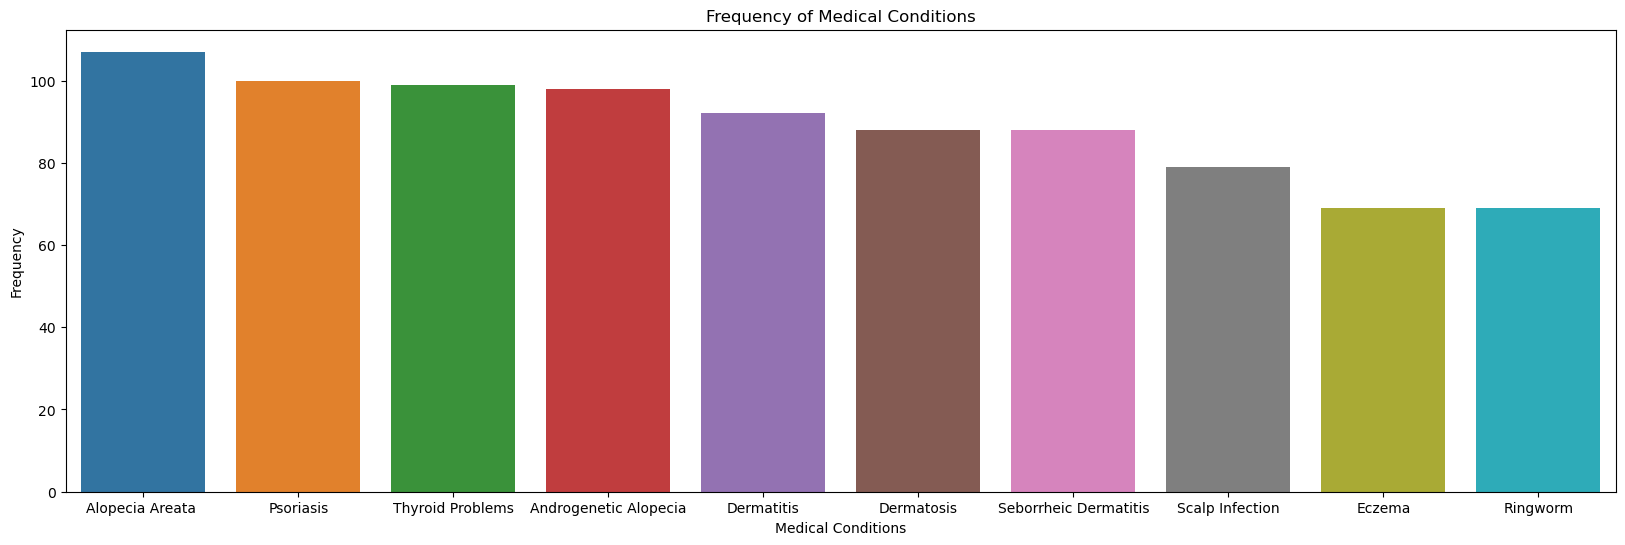

In [14]:
# Descriptive statistics
print(data['Medical Conditions'].describe())

# Bar chart
plt.figure(figsize=(20, 6))
sns.countplot(x='Medical Conditions', data=data, order=data['Medical Conditions'].value_counts().index)
plt.title('Frequency of Medical Conditions')
plt.xlabel('Medical Conditions')
plt.ylabel('Frequency')
plt.show()

#### Alopecia areata is an autoimmune condition where the immune system mistakenly attacks hair follicles
#### T-cells, a type of white blood cell, accumulate around the hair follicles, causing inflammation and disrupting the hair growth process.

count         997
unique         10
top       Rogaine
freq          116
Name: Medications & Treatments, dtype: object


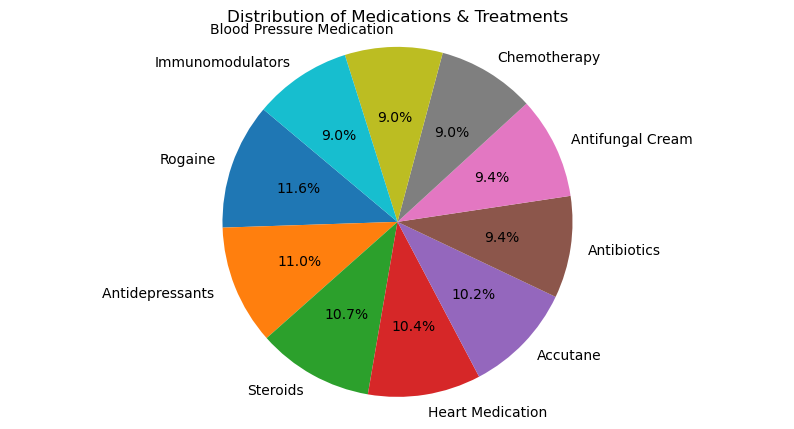

In [15]:
# Descriptive statistics
print(data['Medications & Treatments'].describe())

# Pie chart
plt.figure(figsize=(10, 5))
medications_counts = data['Medications & Treatments'].value_counts()
plt.pie(medications_counts, labels=medications_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medications & Treatments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Rogaine is a brand name for minoxidil, a medication used to treat hair loss
#### Minoxidil is a topical solution applied to the scalp
#### Minoxidil stimulates hair follicles, increasing their size and the diameter of the hair shaft.
#### Minoxidil is believed to improve blood flow to the scalp, providing more nutrients and oxygen to the hair follicles.
#### Itching, redness, and irritation of the scalp.

count                 919
unique                 10
top       Zinc Deficiency
freq                  108
Name: Nutritional Deficiencies, dtype: object


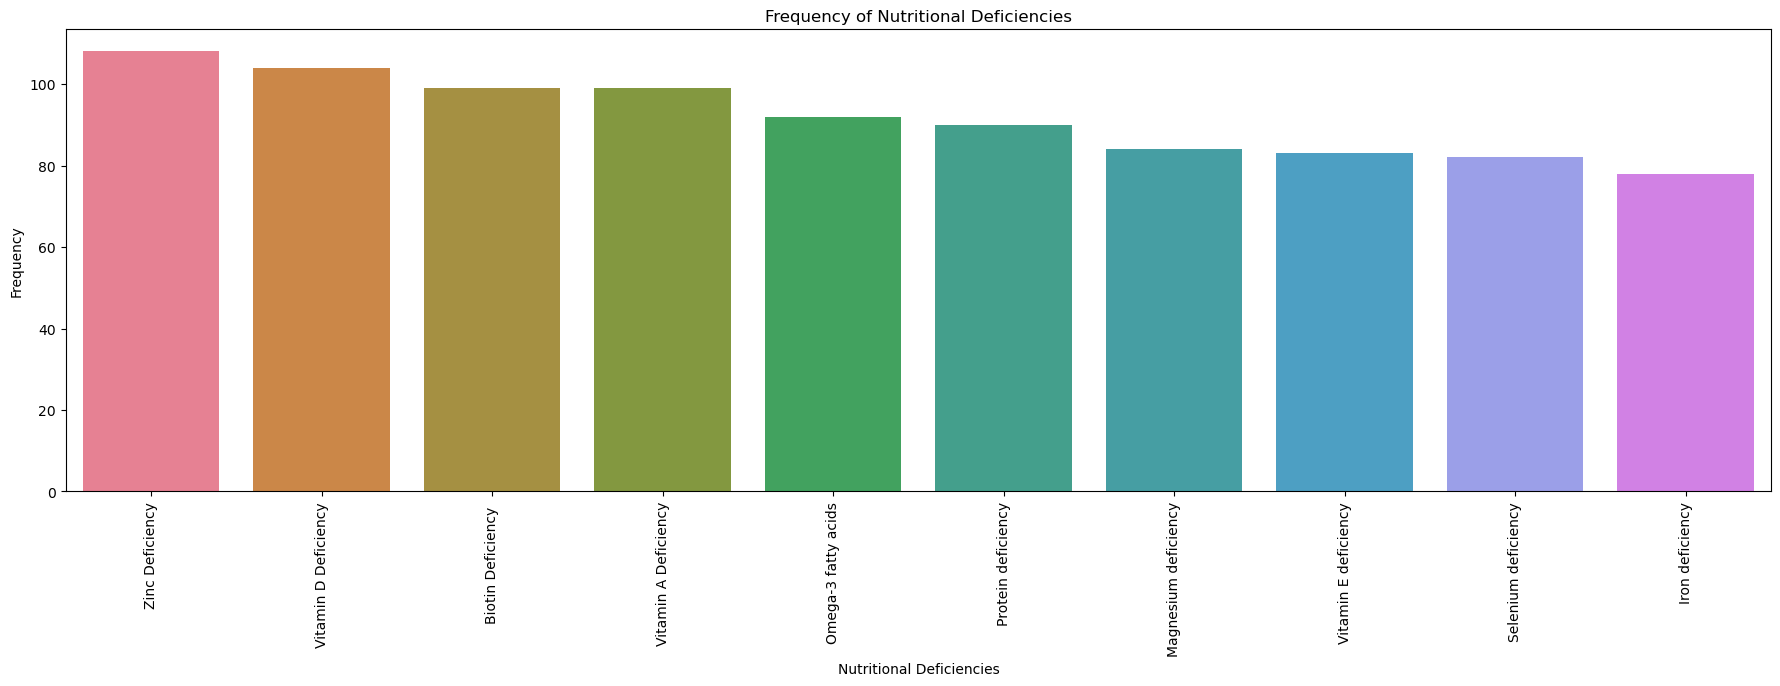

In [16]:
# Descriptive statistics
print(data['Nutritional Deficiencies'].describe())

# Count plot with custom colors
plt.figure(figsize=(22, 6))
colors = sns.color_palette("husl", len(data['Nutritional Deficiencies'].unique()))
sns.countplot(x='Nutritional Deficiencies', data=data, order=data['Nutritional Deficiencies'].value_counts().index, palette=colors)
plt.title('Frequency of Nutritional Deficiencies')
plt.xlabel('Nutritional Deficiencies')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability
plt.show()

#### Zinc deficiency occurs when there is insufficient zinc in the body to meet its needs.
#### It supports hair follicle health, helps in the production of DNA and RNA
#### necessary for normal cell division in hair follicle cells)
#### Zinc is necessary for the synthesis of keratin, the primary protein in hair. A lack of zinc can impair keratin production, affecting hair strength and growth.
#### Zinc helps balance hormones that play a role in hair health
#### Consuming a well-rounded diet that includes adequate amounts of zinc-rich foods like Seafood (Crab,Lobster) Dairy Products (Milk,Cheese,Yogurt) Nuts and Seeds (Pumpkin seeds,Sunflower seeds,Almonds) Vegetables (Mushrooms,Peas,Spinach)

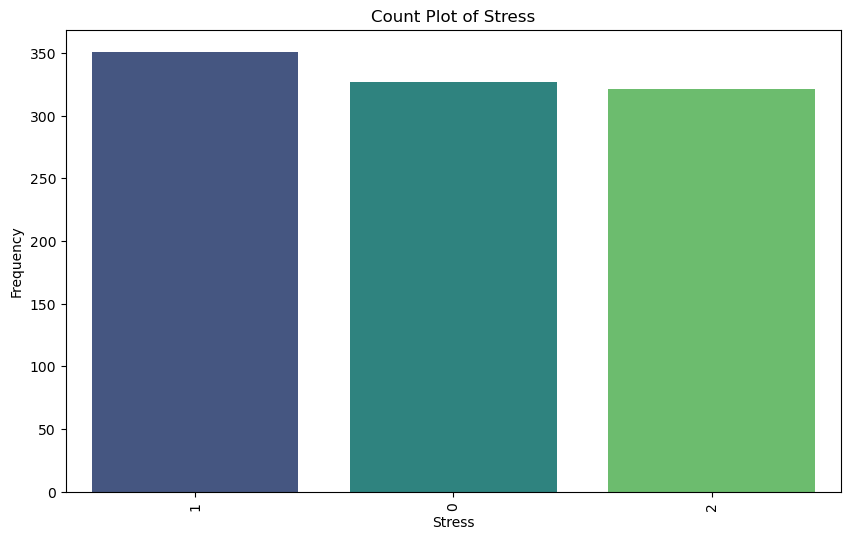

In [17]:
# Count plot for numerical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress', data=data, order=data['Stress'].value_counts().index, palette='viridis')
plt.title('Count Plot of Stress')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability
plt.show()

#### The graph indicates that most people are experiencing moderate stress.

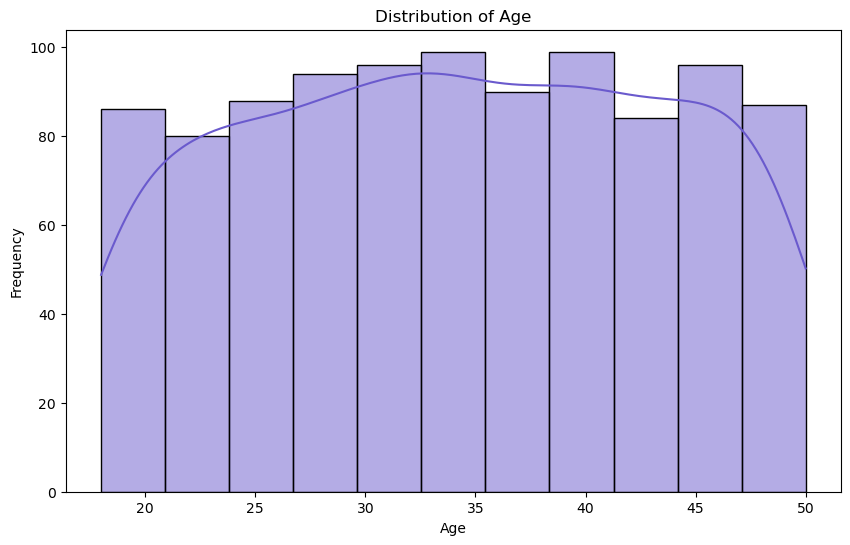

In [18]:
# Distribution plot with custom color
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='#6A5ACD')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### We observed that hair loss significantly increases after the age of 25.

# Data Preprocessing

In [19]:
# Separate features and target variable
X = data.drop('Hair Loss', axis=1)
y = data['Hair Loss']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=[np.number]).columns

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Model Building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [22]:
# Logistic Regression
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression())])
print("Logistic Regression")
evaluate_model(log_reg, X_train, y_train, X_test, y_test)


Logistic Regression
Accuracy: 0.465
[[55 34]
 [73 38]]
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        89
           1       0.53      0.34      0.42       111

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.46       200
weighted avg       0.48      0.47      0.46       200



In [23]:
# Decision Tree
tree_clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])
print("Decision Tree")
evaluate_model(tree_clf, X_train, y_train, X_test, y_test)


Decision Tree
Accuracy: 0.505
[[48 41]
 [58 53]]
              precision    recall  f1-score   support

           0       0.45      0.54      0.49        89
           1       0.56      0.48      0.52       111

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



In [24]:
# Random Forest
forest_clf = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier())])
print("Random Forest")
evaluate_model(forest_clf, X_train, y_train, X_test, y_test)


Random Forest
Accuracy: 0.485
[[56 33]
 [70 41]]
              precision    recall  f1-score   support

           0       0.44      0.63      0.52        89
           1       0.55      0.37      0.44       111

    accuracy                           0.48       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.51      0.48      0.48       200



In [25]:
# Gradient Boosting
gb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', GradientBoostingClassifier())])
print("Gradient Boosting")
evaluate_model(gb_clf, X_train, y_train, X_test, y_test)


Gradient Boosting
Accuracy: 0.515
[[61 28]
 [69 42]]
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        89
           1       0.60      0.38      0.46       111

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.51       200
weighted avg       0.54      0.52      0.51       200



In [26]:
# Support Vector Machine
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC())])
print("Support Vector Machine")
evaluate_model(svm_clf, X_train, y_train, X_test, y_test)

Support Vector Machine
Accuracy: 0.48
[[54 35]
 [69 42]]
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        89
           1       0.55      0.38      0.45       111

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.50      0.48      0.47       200



# Model Evaluation and Selection
Use cross-validation and hyperparameter tuning to select the best model.

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV


In [28]:
# Cross-validation
for name, model in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM'],
                       [log_reg, tree_clf, forest_clf, gb_clf, svm_clf]):
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name} - CV Mean Accuracy: {scores.mean()}')


Logistic Regression - CV Mean Accuracy: 0.48350753768844223
Decision Tree - CV Mean Accuracy: 0.5375226130653267
Random Forest - CV Mean Accuracy: 0.5245678391959799
Gradient Boosting - CV Mean Accuracy: 0.5205276381909548
SVM - CV Mean Accuracy: 0.5165226130653267


In [29]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Params for Random Forest: {grid_search.best_params_}')

# Re-evaluate the best model
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_train, y_train, X_test, y_test)

Best Params for Random Forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Accuracy: 0.475
[[56 33]
 [72 39]]
              precision    recall  f1-score   support

           0       0.44      0.63      0.52        89
           1       0.54      0.35      0.43       111

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.50      0.47      0.47       200



# CODE FOR DEPLOYMENT:

In [30]:
#pip install flask

In [31]:
import joblib # joblib library is a Python package used for efficient serialization and deserialization of Python objects.

In [32]:
# Save the model to a file
joblib.dump(model, 'hair_fall_model.pkl')


['hair_fall_model.pkl']

In [33]:
import gradio as gr
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load('hair_fall_model.pkl')

# Define the prediction function
def predict_hair_fall(genetics, hormonal_changes, medical_conditions, medications_treatments, nutritional_deficiencies, stress, age, poor_hair_care_habits, environmental_factors, smoking, weight_loss):
    # Create a DataFrame from the input
    input_data = pd.DataFrame({
        'Genetics': [genetics],
        'Hormonal Changes': [hormonal_changes],
        'Medical Conditions': [medical_conditions],
        'Medications & Treatments': [medications_treatments],
        'Nutritional Deficiencies': [nutritional_deficiencies],
        'Stress': [stress],
        'Age': [age],
        'Poor Hair Care Habits': [poor_hair_care_habits],
        'Environmental Factors': [environmental_factors],
        'Smoking': [smoking],
        'Weight Loss': [weight_loss]
    })

    # Encode categorical variables
    label_encoders = {}
    for column in input_data.columns:
        if input_data[column].dtype == 'object':
            le = LabelEncoder()
            le.fit(input_data[column])
            input_data[column] = le.transform(input_data[column])
            label_encoders[column] = le
    
    # Make prediction
    prediction = model.predict(input_data)
    return 'Yes' if prediction[0] == 1 else 'No'

# Create the Gradio interface
inputs = [
    gr.Dropdown(['Yes', 'No'], label='Genetics'),
    gr.Dropdown(['Yes', 'No'], label='Hormonal Changes'),
    gr.Textbox(label='Medical Conditions'),
    gr.Textbox(label='Medications & Treatments'),
    gr.Textbox(label='Nutritional Deficiencies'),
    gr.Dropdown(['Low', 'Moderate', 'High'], label='Stress'),
    gr.Number(label='Age'),
    gr.Dropdown(['Yes', 'No'], label='Poor Hair Care Habits'),
    gr.Dropdown(['Yes', 'No'], label='Environmental Factors'),
    gr.Dropdown(['Yes', 'No'], label='Smoking'),
    gr.Dropdown(['Yes', 'No'], label='Weight Loss')
]

outputs = gr.Textbox(label='Prediction')

gr.Interface(fn=predict_hair_fall, inputs=inputs, outputs=outputs, title="Hair Fall Prediction Model").launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
